### A US-based housing company named Surprise Housing has decided to enter the Australian market. 
The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 
For the same purpose, the company has collected a data set from the sale of houses in Australia.

##### The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

### You are required to model the price of houses with the available independent variables. 
This model will then be used by the management to understand how exactly the prices vary with the variables. 
They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 
Further, the model will be a good way for management to understand the pricing dynamics of a new market.

import the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

read the data

In [4]:
house= pd.read_csv(r'C:\Users\91797\Desktop\train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


understand the data

In [5]:
house.shape

(1460, 81)

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


analysis null value

In [8]:
house.isnull().sum()[(house.isnull().sum()>0)]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

null value percentage which is greater than zero

In [9]:
round(100*house.isnull().sum()[(house.isnull().sum()>0)]/len(house), 2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

delete the column which have null value more than 15 %

In [10]:
house.drop(['Alley','PoolQC','MiscFeature','Fence','LotFrontage','FireplaceQu'], axis='columns', inplace=True)

In [11]:
house.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


Before proceeding ahaed, we will try to convert the Year columns into the age where we are going to fill these columns with number, And max year for all these columns come out to be 2010. For example, suppose the YrSold=2000 , Then YrSold_Old = 2010-2000 = 10

In [12]:
#Defining method to calculate age from year
def yearToAge(data_frame,col):
    new_cal = col + '_Old'
    data_frame[new_cal] = data_frame[col].max()-house[col]

In [13]:
#Converting the year column into age
yearToAge(house,'YearBuilt')
yearToAge(house,'YearRemodAdd')
yearToAge(house,'GarageYrBlt')
yearToAge(house,'YrSold')

In [14]:
#Let's have a look on data after converting into age
house[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,2003,2003,2003.0,2008,7,7,7.0,2
1,1976,1976,1976.0,2007,34,34,34.0,3
2,2001,2002,2001.0,2008,9,8,9.0,2
3,1915,1970,1998.0,2006,95,40,12.0,4
4,2000,2000,2000.0,2008,10,10,10.0,2


now drop the year column

In [15]:
house= house.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis = 'columns')

replace the missing value

In [16]:
#Defining method for imputing missing values 
def imputingMissingValue(data_frame,col,value):
    data_frame[col].fillna(value, inplace = True)

In [17]:
house.isnull().sum()[(house.isnull().sum()>0)]

MasVnrType          8
MasVnrArea          8
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Electrical          1
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
GarageYrBlt_Old    81
dtype: int64

In [18]:
imputingMissingValue(house,'MasVnrType', 'None')
imputingMissingValue(house,'MasVnrArea' ,house.MasVnrArea.mean())
imputingMissingValue(house,'BsmtQual', 'TA')
imputingMissingValue(house,'BsmtCond', 'TA')
imputingMissingValue(house,'BsmtExposure', 'No')
imputingMissingValue(house,'BsmtFinType1', 'Unf')
imputingMissingValue(house,'BsmtFinType2', 'Unf')
imputingMissingValue(house,'GarageType', 'Attchd')
imputingMissingValue(house,'GarageYrBlt_Old', -1)
imputingMissingValue(house,'GarageFinish', 'Unf')
imputingMissingValue(house,'GarageQual', 'TA')
imputingMissingValue(house,'GarageCond', 'TA')
imputingMissingValue(house,'Electrical', 'SBrkr')

drop the value which are not useful

In [19]:
house= house.drop(['Utilities','Street','Id'], axis = 'columns')

In [20]:
house.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,2,WD,Normal,208500,7,7,7.0,2
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,0,0,5,WD,Normal,181500,34,34,34.0,3
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,9,WD,Normal,223500,9,8,9.0,2
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,0,0,2,WD,Abnorml,140000,95,40,12.0,4
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,0,0,12,WD,Normal,250000,10,10,10.0,2


In [21]:
round(100*house.isnull().sum()[(house.isnull().sum()>0)]/len(house), 2)

Series([], dtype: float64)

there is no null value

#### Exploratory Data Analysis

ValueError: num must be 1 <= num <= 24, not 25

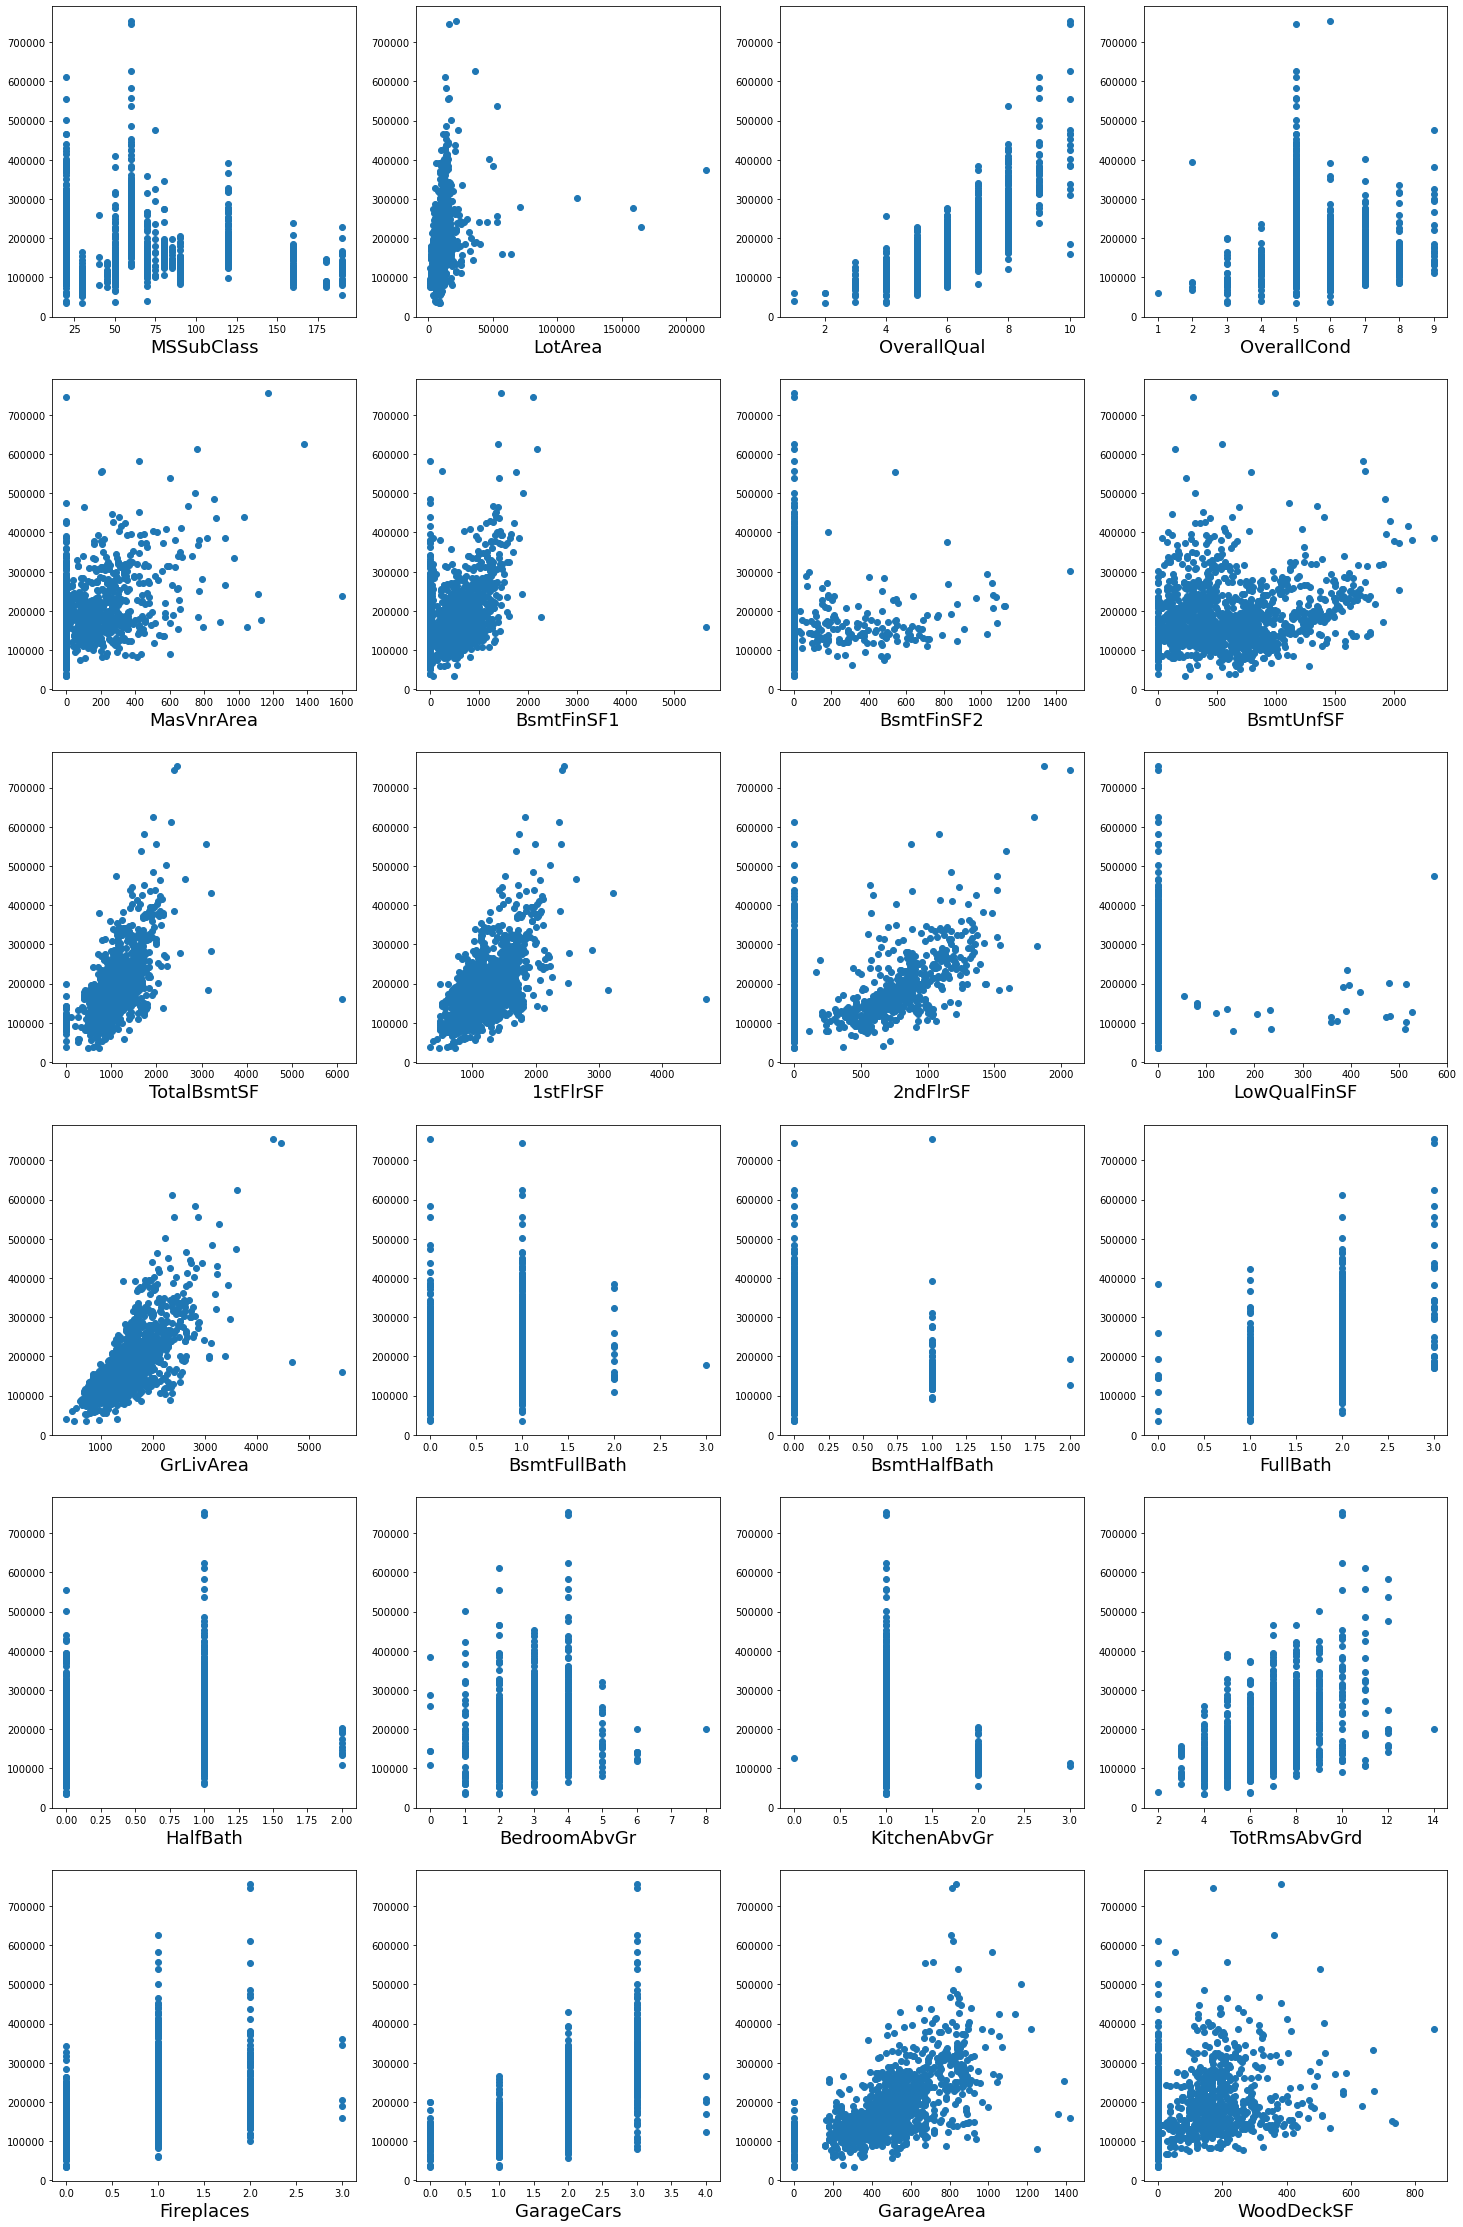

In [22]:
#check all numeric column
num_col=list(house.select_dtypes(['int64','float64']))
plt.figure(figsize=(25,40))
for m,n in enumerate(num_col):
    plt.subplot(6,4,(m+1))
    plt.scatter(house[n],house['SalePrice'])
    plt.xlabel(n,fontsize=18)
plt.show()

ValueError: num must be 1 <= num <= 22, not 23

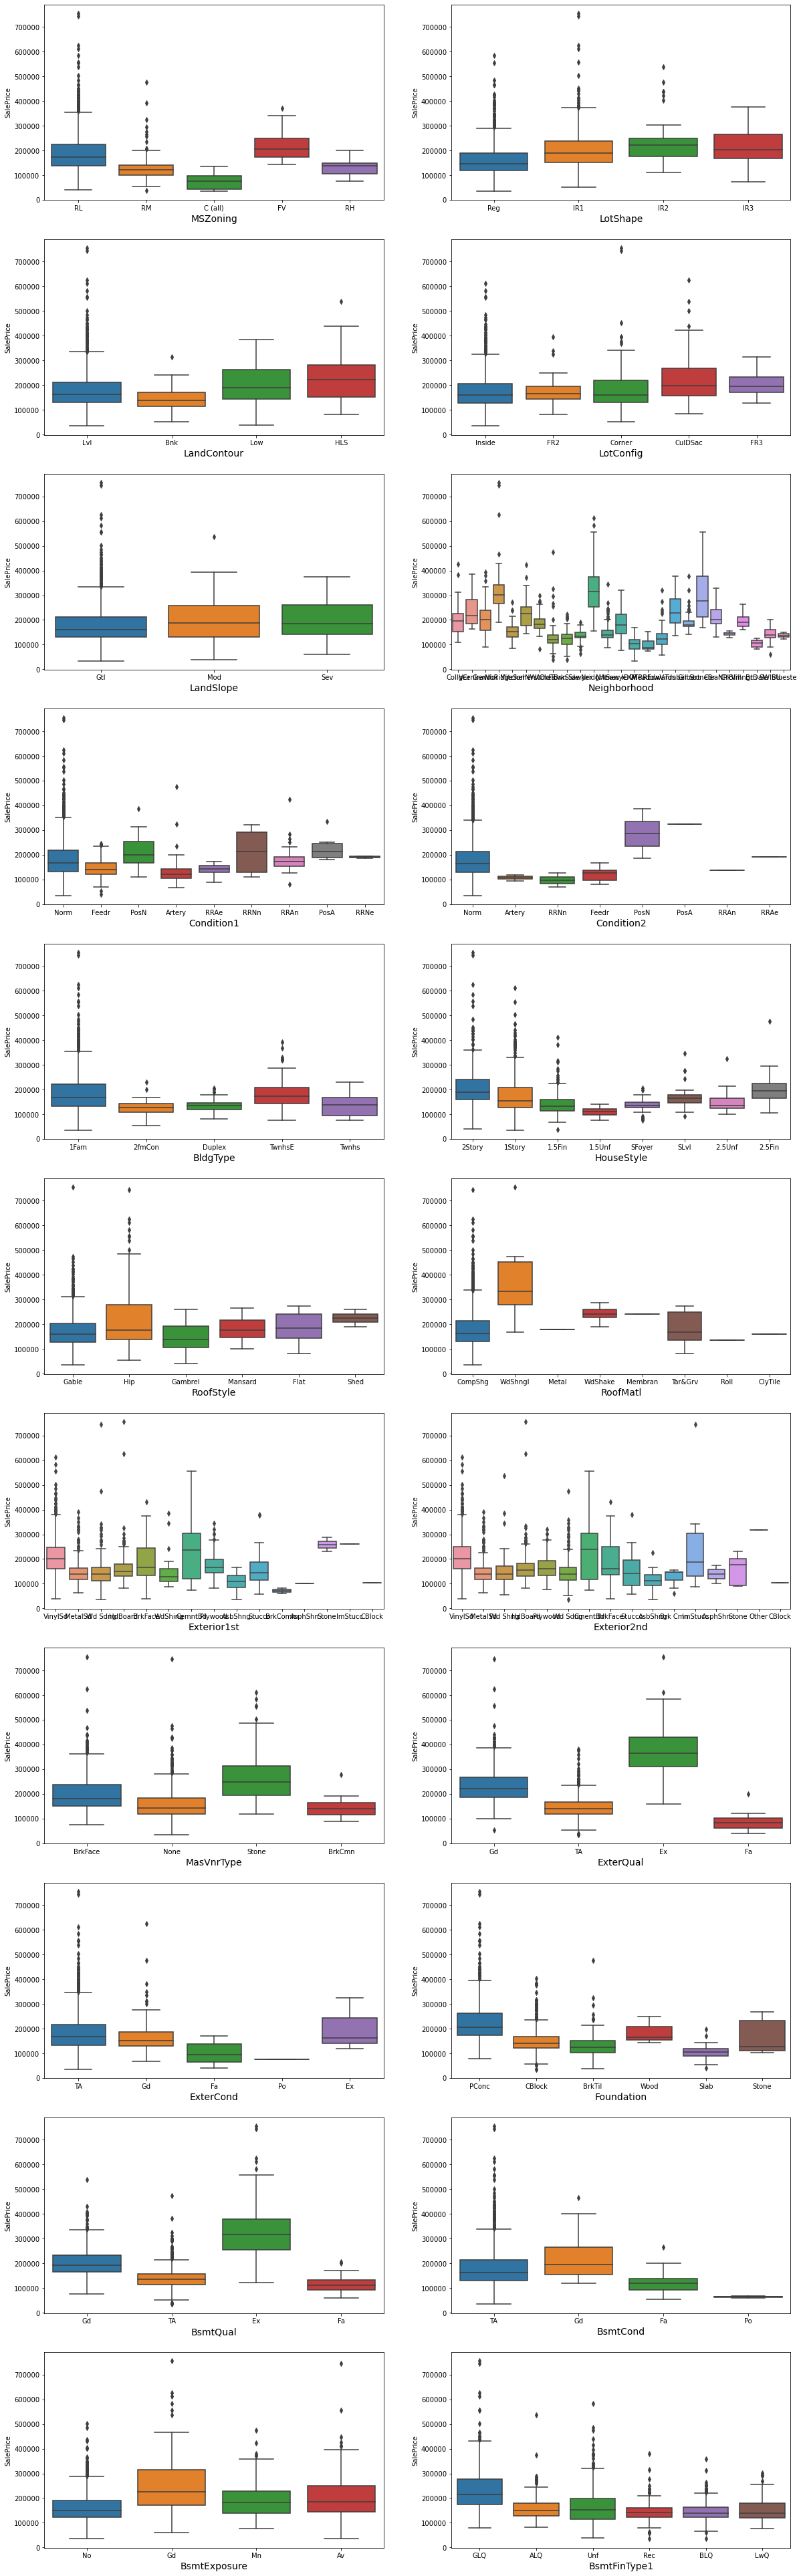

In [23]:
#check all categorical Columns
cat_col = list(house.select_dtypes('object'))
plt.figure(figsize=(20,70))
for m,n in enumerate(cat_col):
    plt.subplot(11,2,(m+1))
    sns.boxplot(x=n, y='SalePrice',data=house)
    plt.xlabel(n, fontsize=14)
plt.show()

In [24]:
# Defining method for plotting graphs based on numerical/continuous variables
def numericColAnalysis(data_frame, index,independent_variable ,target_variable):
    plt.figure(figsize = (20, 26))
    plt.figure(index)
    sns.jointplot(x = independent_variable, y = target_variable, data = data_frame[[independent_variable,target_variable]])

In [25]:
# Defining method for plotting graphs based on categorical variables
def categoricalColAnalysis(data_frame, index,independent_variable ,target_variable):
    plt.figure(index)
    variables = data_frame[[independent_variable]].nunique()
    plt.figure(figsize = (variables,variables/1.77))
    my_order = data_frame[[independent_variable,target_variable]].groupby(by = [independent_variable])[target_variable].median().sort_values(ascending=True)
    sns.boxplot(x = independent_variable, y = target_variable, data= data_frame[[independent_variable,target_variable]], order = my_order.index)

In [26]:
#Get all numerical Columns
numerical_columns = house.select_dtypes(include = np.number).columns.tolist()
numerical_columns.remove('SalePrice')

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

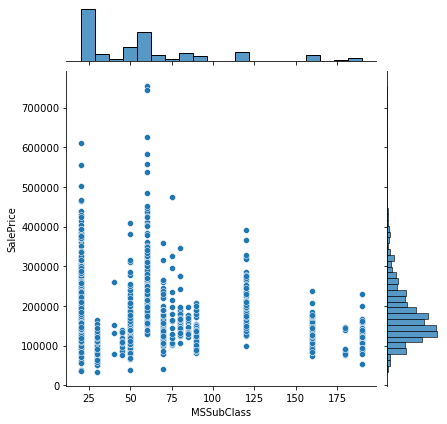

<Figure size 1440x1872 with 0 Axes>

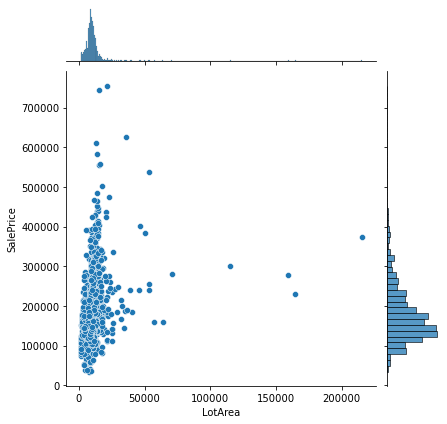

<Figure size 1440x1872 with 0 Axes>

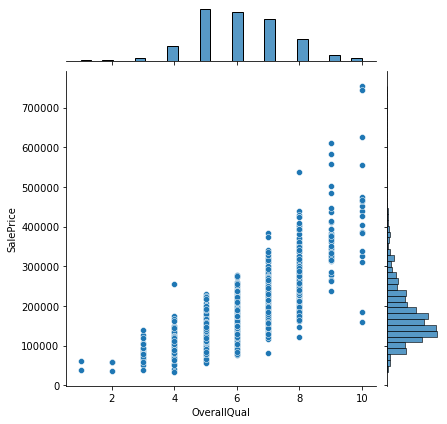

<Figure size 1440x1872 with 0 Axes>

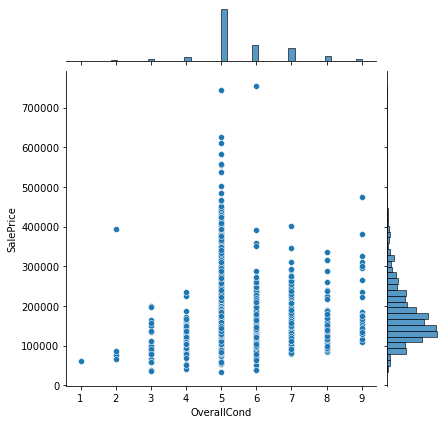

<Figure size 1440x1872 with 0 Axes>

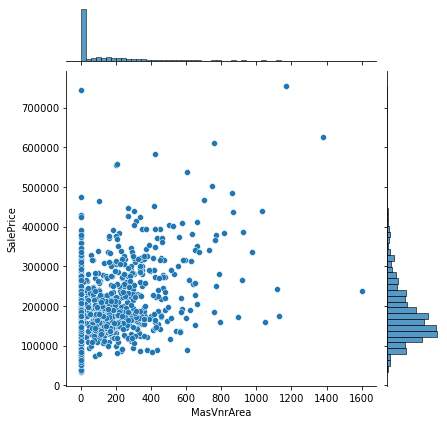

<Figure size 1440x1872 with 0 Axes>

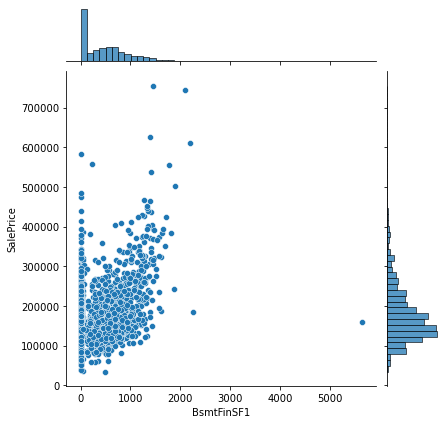

<Figure size 1440x1872 with 0 Axes>

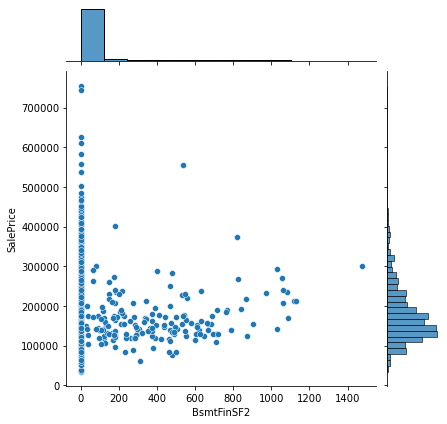

<Figure size 1440x1872 with 0 Axes>

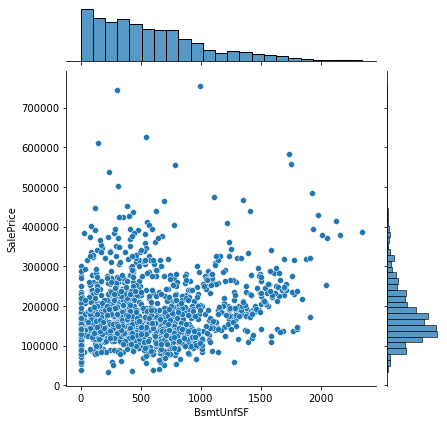

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

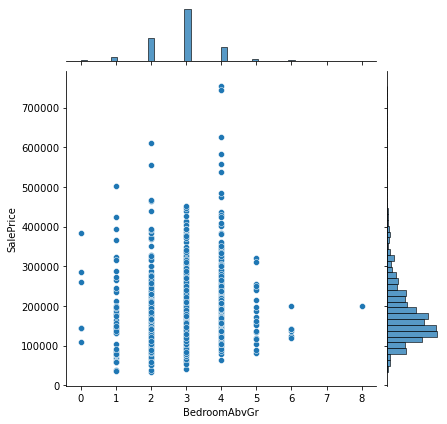

<Figure size 1440x1872 with 0 Axes>

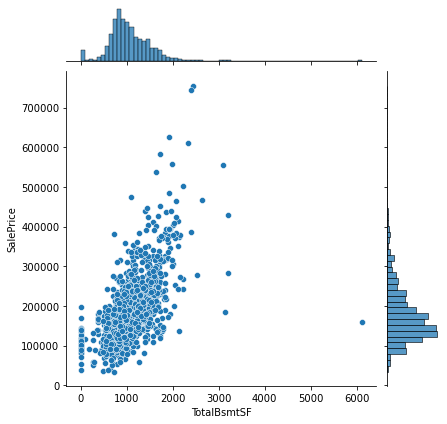

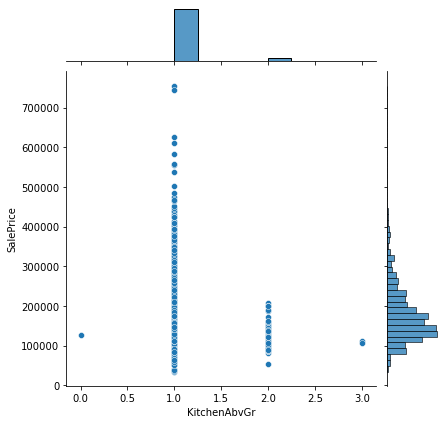

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

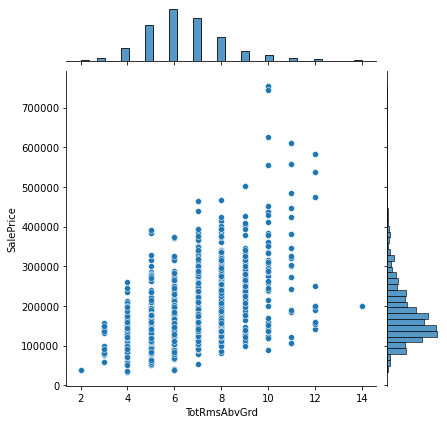

<Figure size 1440x1872 with 0 Axes>

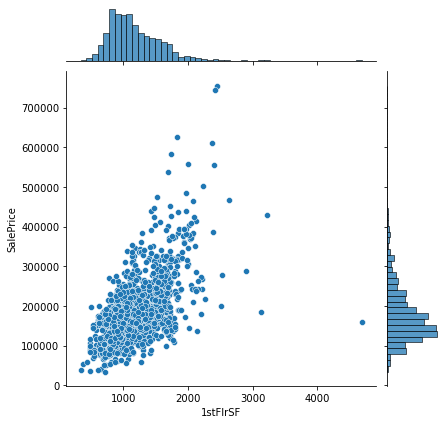

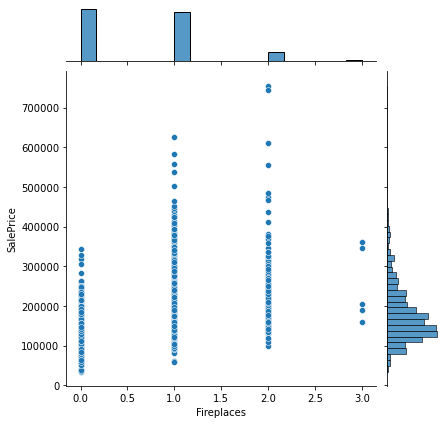

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

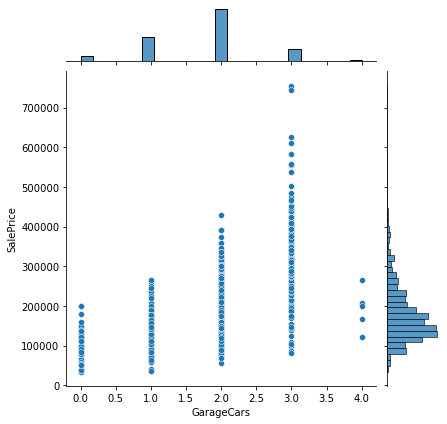

<Figure size 1440x1872 with 0 Axes>

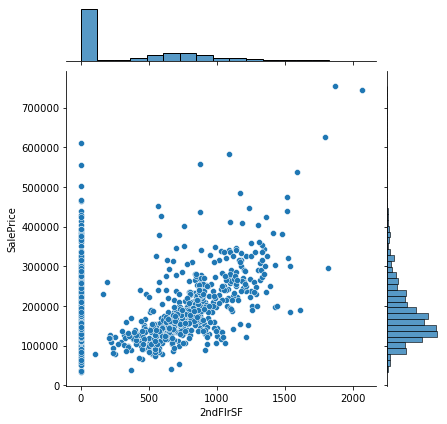

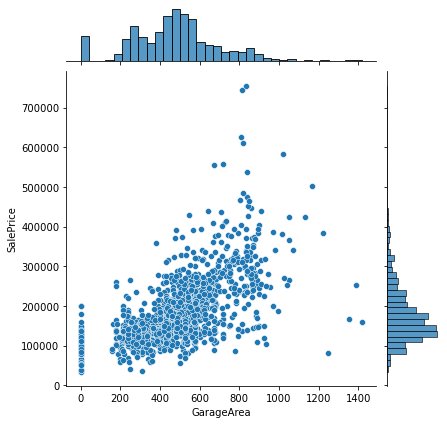

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

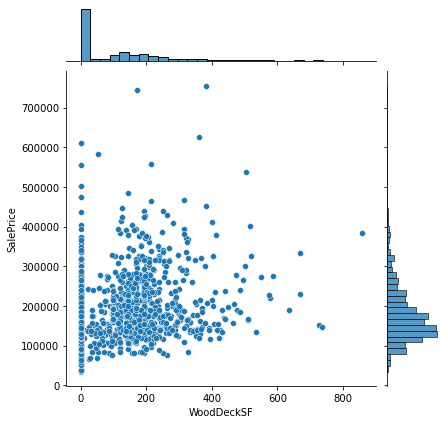

<Figure size 1440x1872 with 0 Axes>

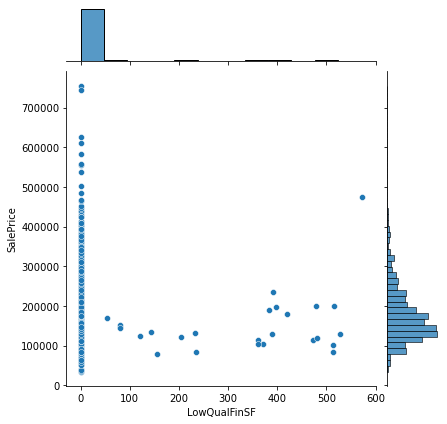

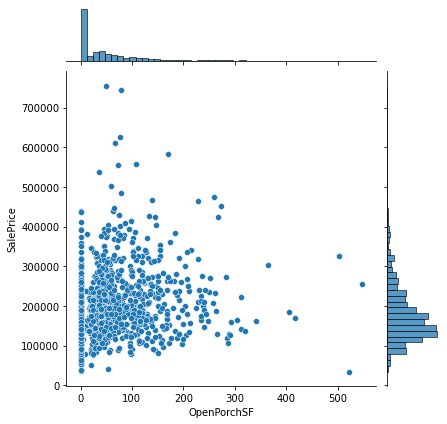

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

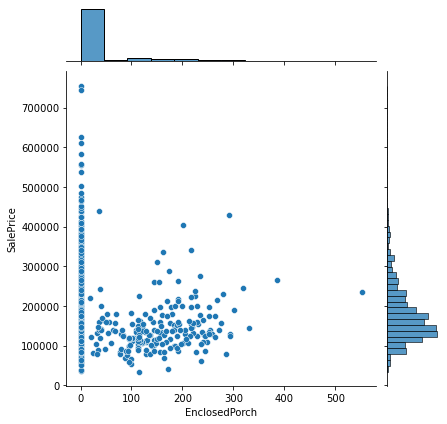

<Figure size 1440x1872 with 0 Axes>

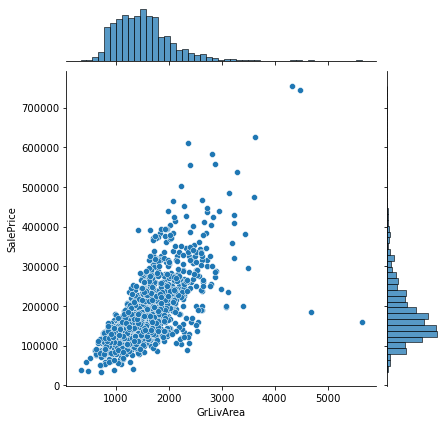

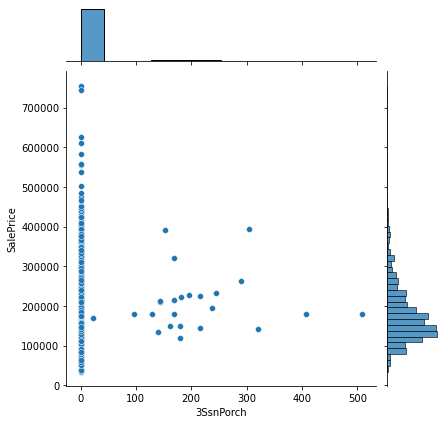

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

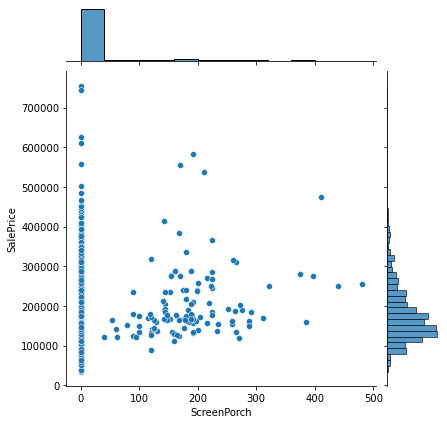

<Figure size 1440x1872 with 0 Axes>

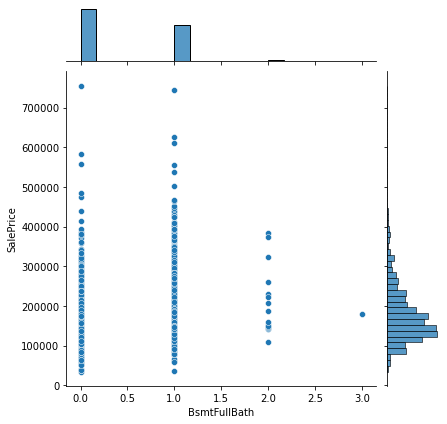

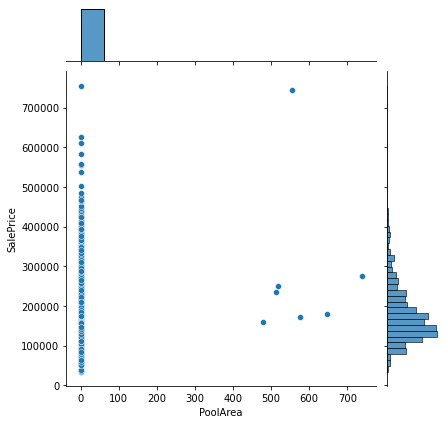

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

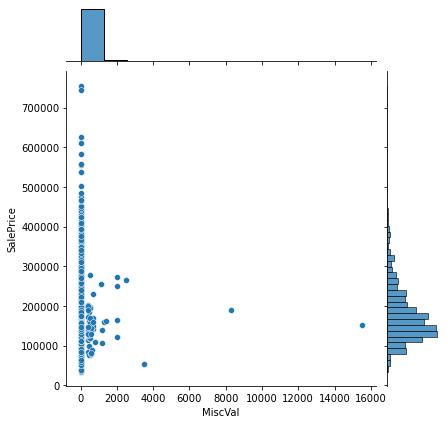

<Figure size 1440x1872 with 0 Axes>

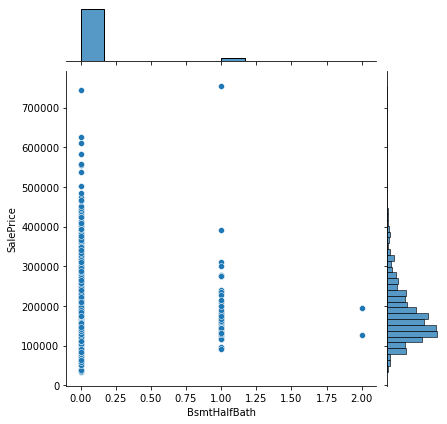

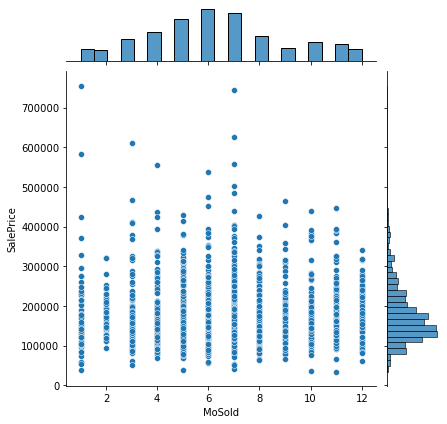

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

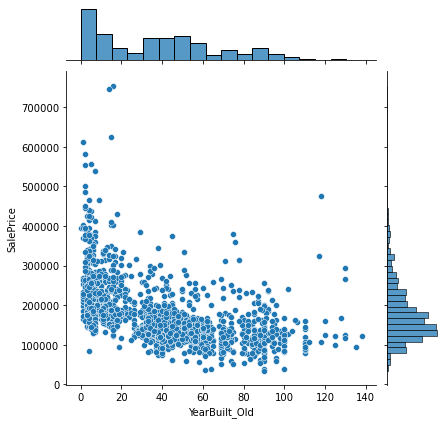

<Figure size 1440x1872 with 0 Axes>

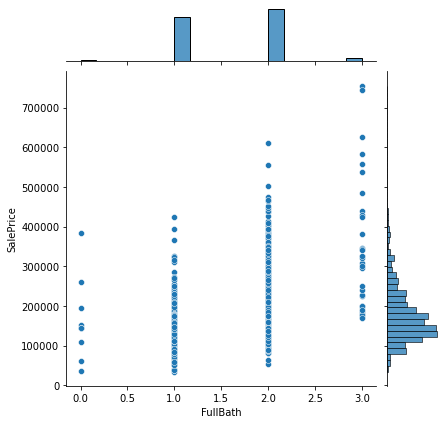

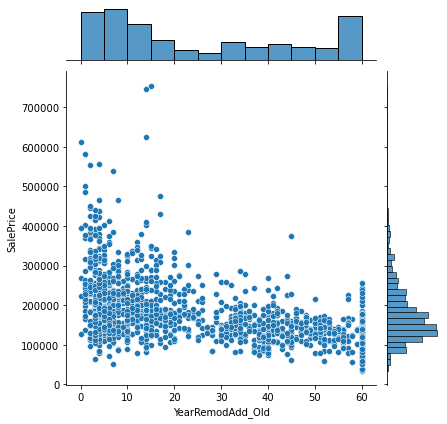

<Figure size 1440x1872 with 0 Axes>

<Figure size 1440x1872 with 0 Axes>

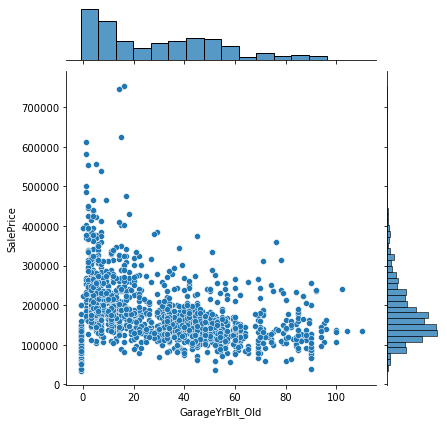

<Figure size 1440x1872 with 0 Axes>

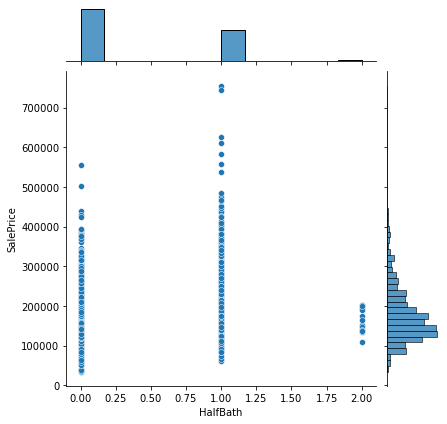

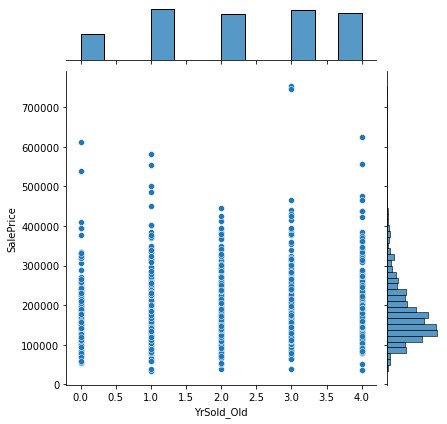

In [27]:
#Ploting the graph for all numerical variables
for index, col in enumerate(numerical_columns):
    numericColAnalysis(house, index, col, 'SalePrice')

In [28]:
#Get all categorical Columns
categorical_columns = house.select_dtypes(include = np.object).columns.tolist()
for col in categorical_columns:
    print(col,' : ',house[col].head().unique())

MSZoning  :  ['RL']
LotShape  :  ['Reg' 'IR1']
LandContour  :  ['Lvl']
LotConfig  :  ['Inside' 'FR2' 'Corner']
LandSlope  :  ['Gtl']
Neighborhood  :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge']
Condition1  :  ['Norm' 'Feedr']
Condition2  :  ['Norm']
BldgType  :  ['1Fam']
HouseStyle  :  ['2Story' '1Story']
RoofStyle  :  ['Gable']
RoofMatl  :  ['CompShg']
Exterior1st  :  ['VinylSd' 'MetalSd' 'Wd Sdng']
Exterior2nd  :  ['VinylSd' 'MetalSd' 'Wd Shng']
MasVnrType  :  ['BrkFace' 'None']
ExterQual  :  ['Gd' 'TA']
ExterCond  :  ['TA']
Foundation  :  ['PConc' 'CBlock' 'BrkTil']
BsmtQual  :  ['Gd' 'TA']
BsmtCond  :  ['TA' 'Gd']
BsmtExposure  :  ['No' 'Gd' 'Mn' 'Av']
BsmtFinType1  :  ['GLQ' 'ALQ']
BsmtFinType2  :  ['Unf']
Heating  :  ['GasA']
HeatingQC  :  ['Ex' 'Gd']
CentralAir  :  ['Y']
Electrical  :  ['SBrkr']
KitchenQual  :  ['Gd' 'TA']
Functional  :  ['Typ']
GarageType  :  ['Attchd' 'Detchd']
GarageFinish  :  ['RFn' 'Unf']
GarageQual  :  ['TA']
GarageCond  :  ['TA']
PavedDrive  :  ['Y']
SaleTy

<Figure size 432x288 with 0 Axes>

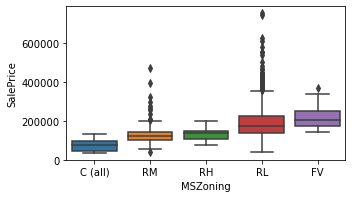

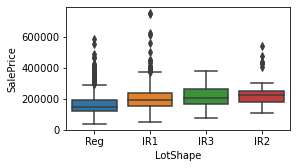

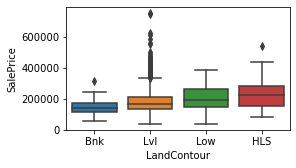

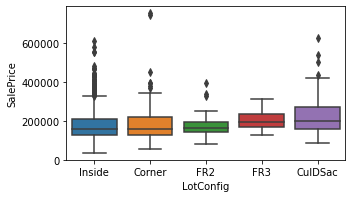

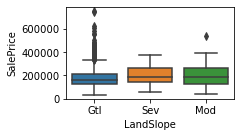

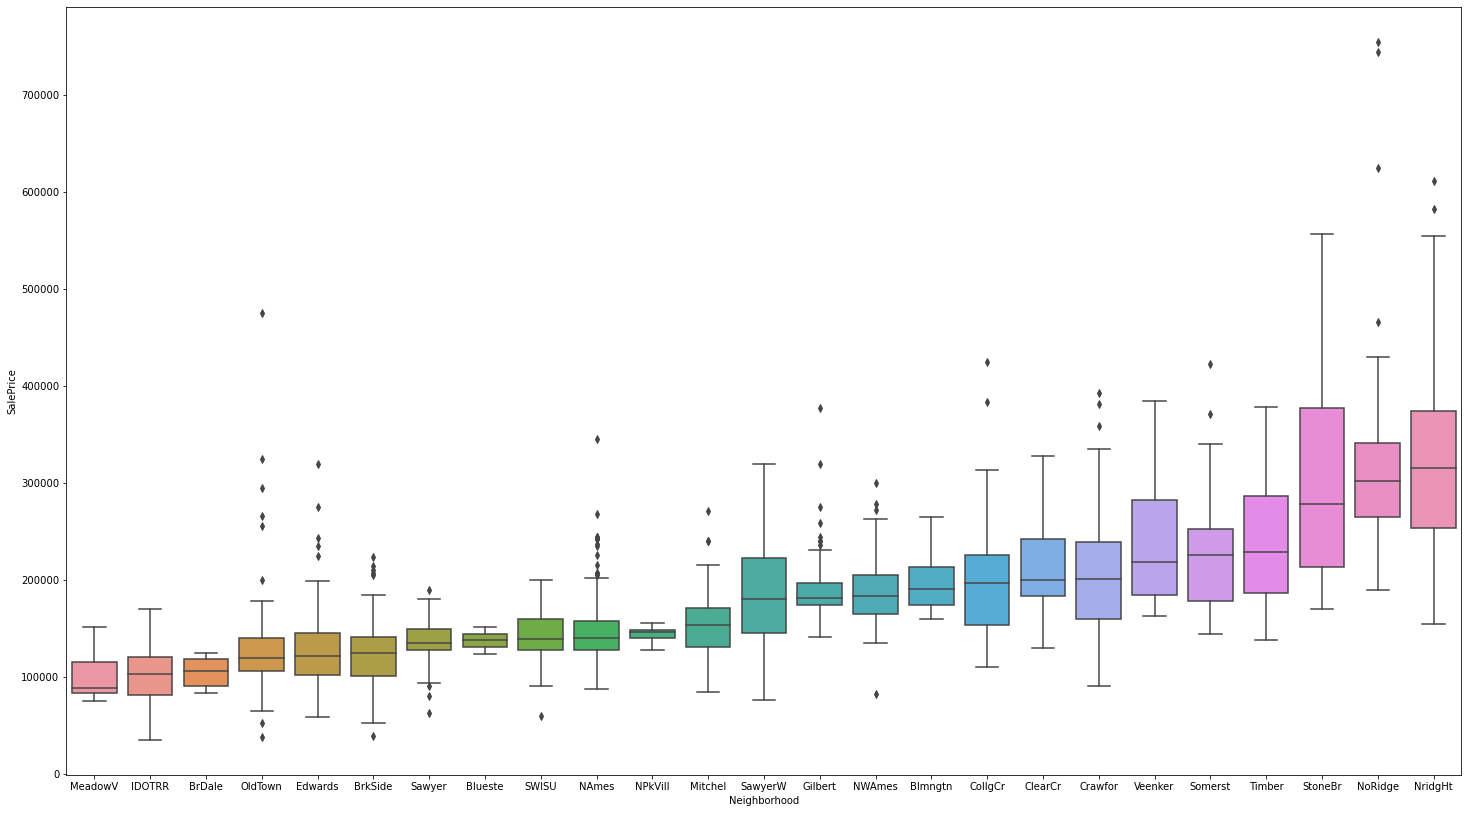

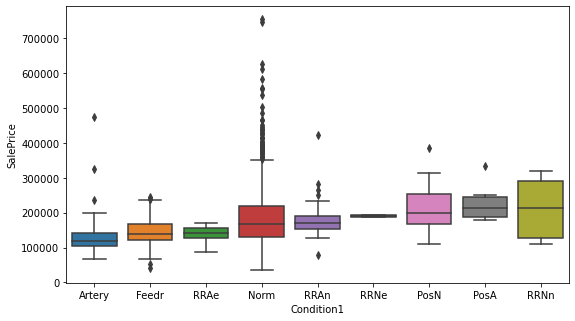

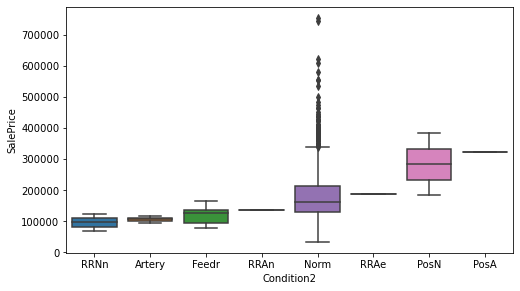

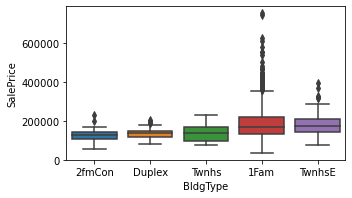

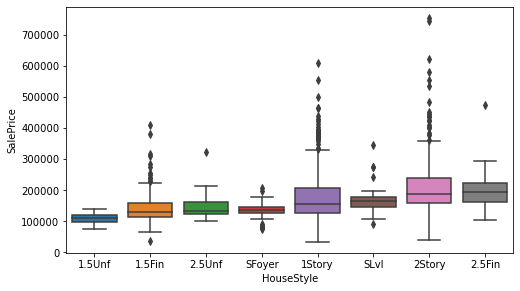

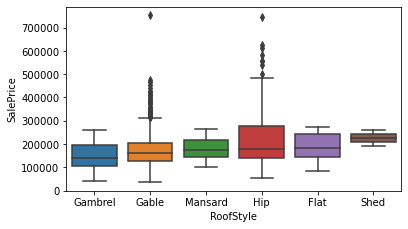

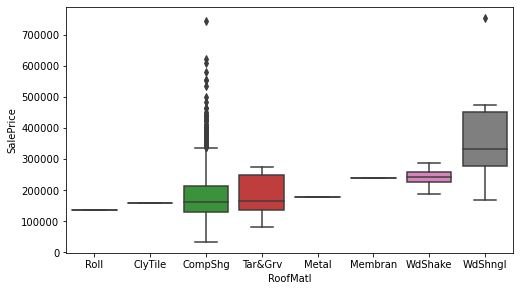

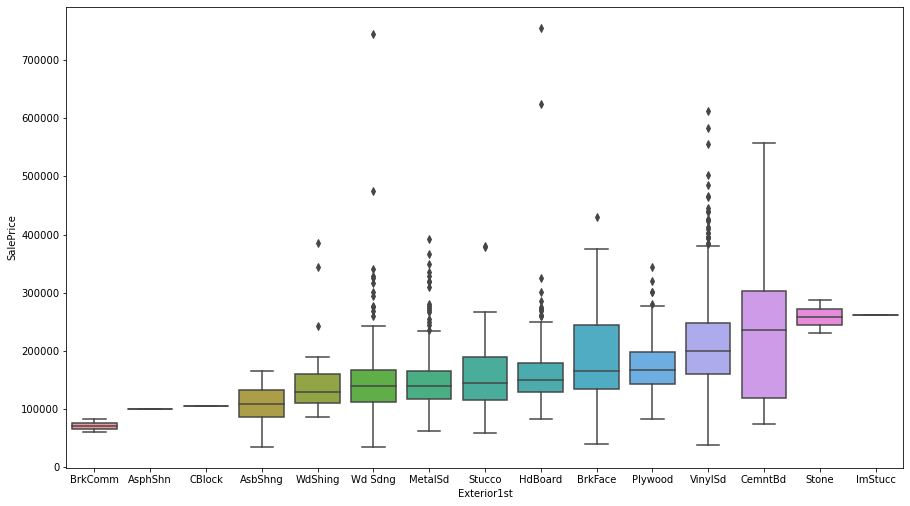

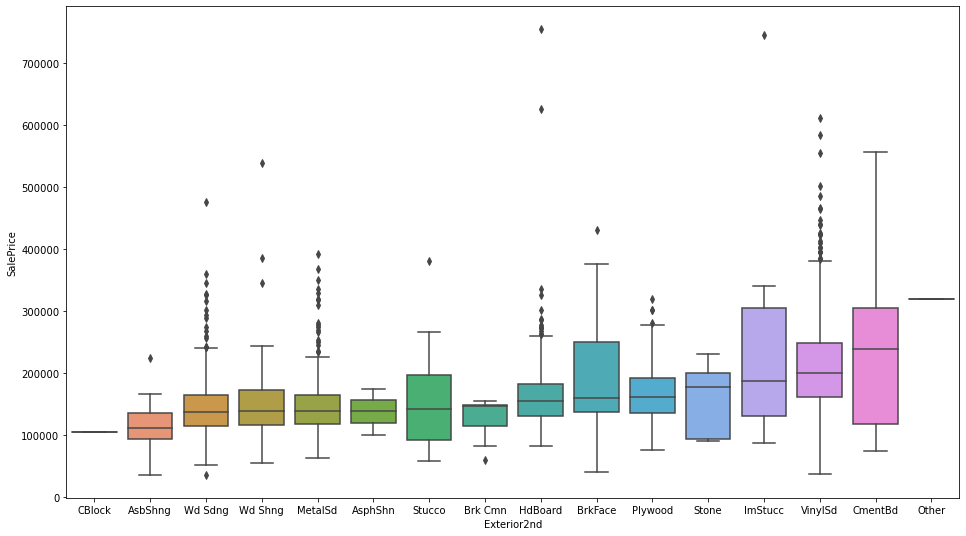

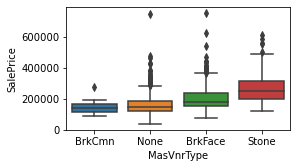

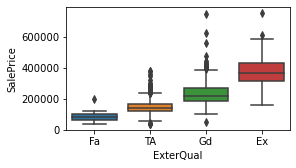

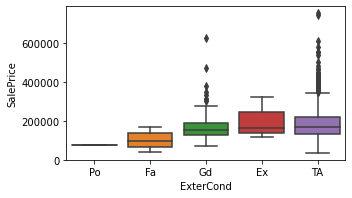

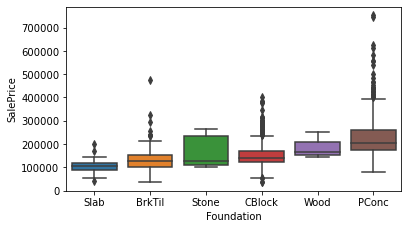

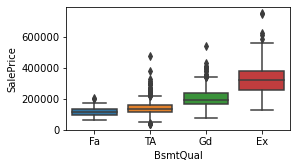

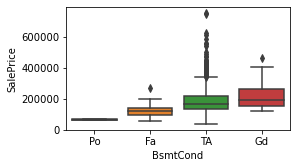

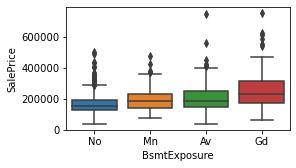

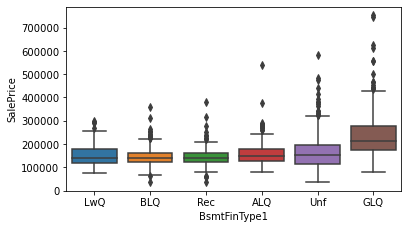

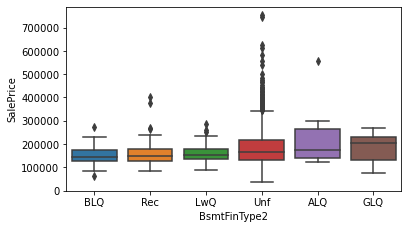

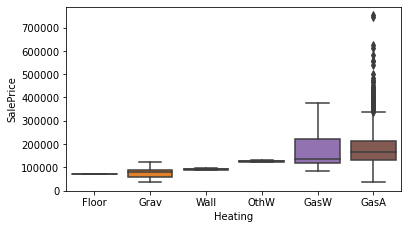

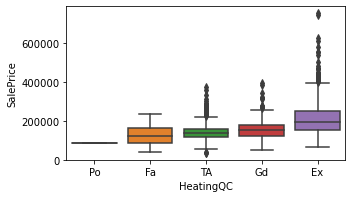

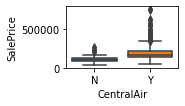

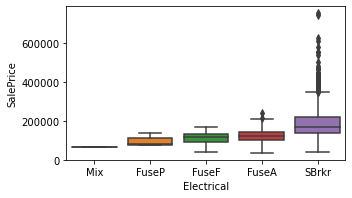

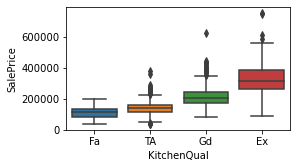

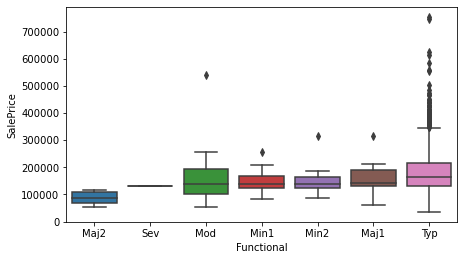

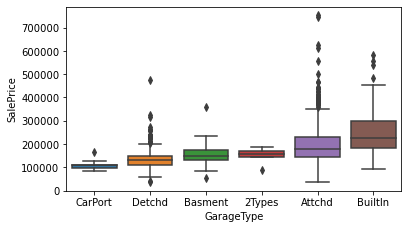

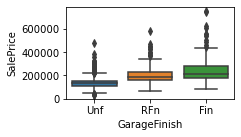

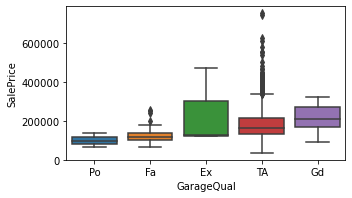

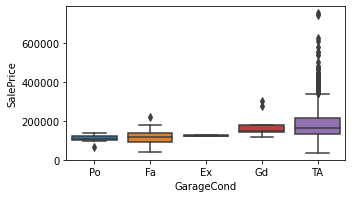

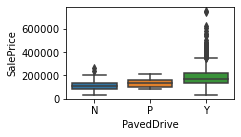

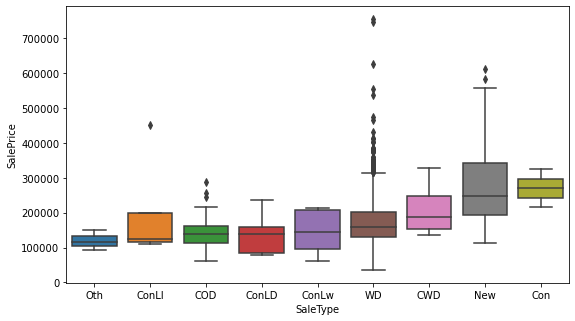

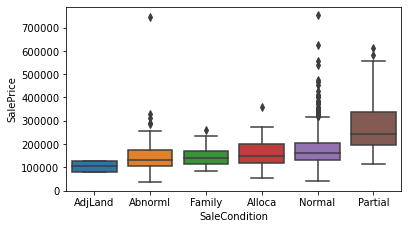

In [29]:
#Ploting the graph for all categorical variables
for index, col in enumerate(categorical_columns):
    categoricalColAnalysis(house, index, col, 'SalePrice')

##### check correlations  

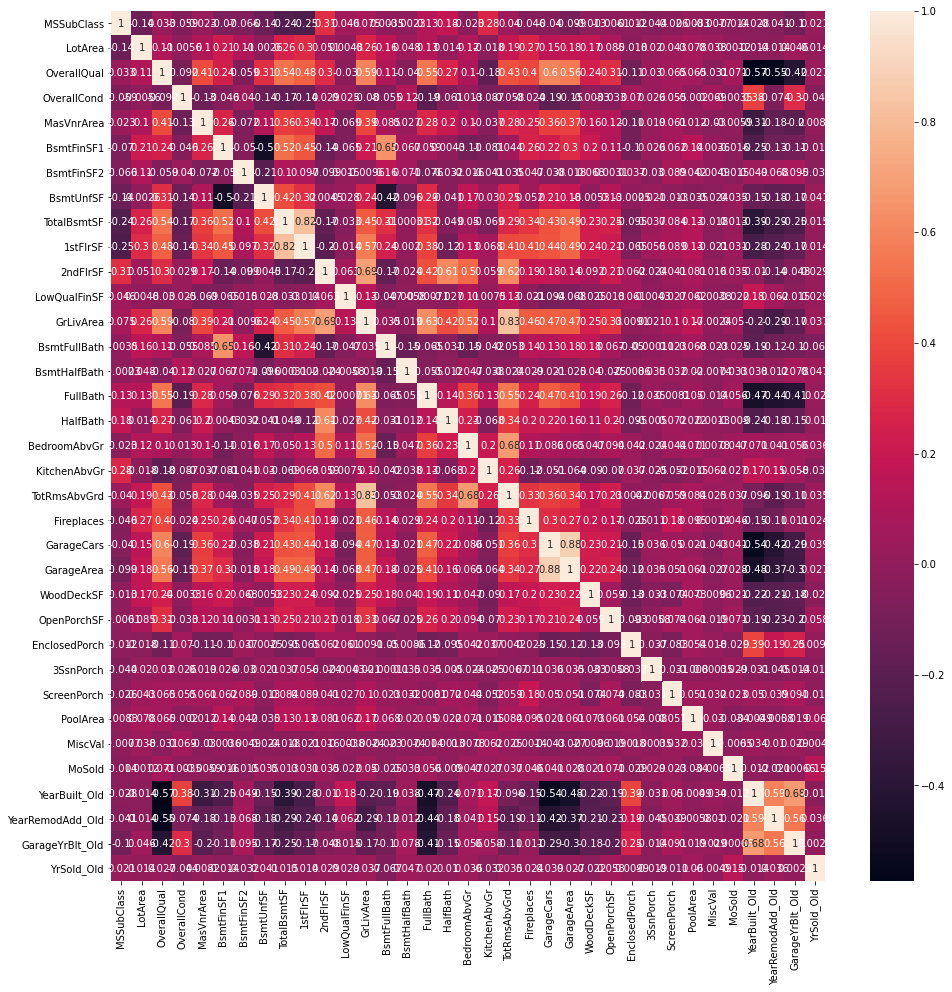

In [30]:
plt.figure(figsize=(16,16))
sns.heatmap(house[numerical_columns].corr(), annot = True)
plt.show()

Preparing tha Data for Modelling

In [31]:
#outlier treatment
def dropOutliers(data_frame, numerical_columns):
    list = []
    for col in numerical_columns:
        Q1 = data_frame[col].quantile(.25)
        Q3 = data_frame[col].quantile(.99)
        IQR = Q3-Q1
        data_frame =  data_frame[(data_frame[col] >= (Q1-(1.5*IQR))) & (data_frame[col] <= (Q3+(1.5*IQR)))] 
    return data_frame

taking outlier for 0.25 and 0.99, the lowest and highest part

In [32]:
numerical_columns = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
house = dropOutliers(house, numerical_columns)

In [33]:
house[categorical_columns].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


Let's check for the below columns, here we can clearly see that these are having some kind of order and hence we can say these are ordinal in nature

In [34]:
ordinal_columns = ['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']
house[ordinal_columns].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


 convert categorical variable to numeric. 


In [35]:
#convert categorical variables into factors i.e number because to make things easy.
house[ordinal_columns[0]] = house[ordinal_columns[0]].map({'Gtl':0,'Mod':1,'Sev':2})
house[ordinal_columns[1]] = house[ordinal_columns[1]].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house[ordinal_columns[2]] = house[ordinal_columns[2]].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house[ordinal_columns[3]] = house[ordinal_columns[3]].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house[ordinal_columns[4]] = house[ordinal_columns[4]].map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house[ordinal_columns[5]] = house[ordinal_columns[5]].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house[ordinal_columns[6]] = house[ordinal_columns[6]].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house[ordinal_columns[7]] = house[ordinal_columns[7]].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house[ordinal_columns[8]] = house[ordinal_columns[8]].map({'N':0,'Y':1})
house[ordinal_columns[9]] = house[ordinal_columns[9]].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house[ordinal_columns[10]] = house[ordinal_columns[10]].map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
house[ordinal_columns[11]] = house[ordinal_columns[11]].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house[ordinal_columns[12]] = house[ordinal_columns[12]].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house[ordinal_columns[13]] = house[ordinal_columns[13]].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house[ordinal_columns[14]] = house[ordinal_columns[14]].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [36]:
house[ordinal_columns].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


create dummy variable

In [37]:
dummy = pd.get_dummies(house[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

house = pd.concat([house,dummy],axis='columns')

house = house.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

split the data

In [38]:
df_train,df_test = train_test_split(house,train_size=0.7,test_size=0.3,random_state=50)

SCaling the data

In [39]:
numerical_columns = house.select_dtypes(include=np.number).columns.tolist()
scaler = StandardScaler()
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])
df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])

analysis distribution of data

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

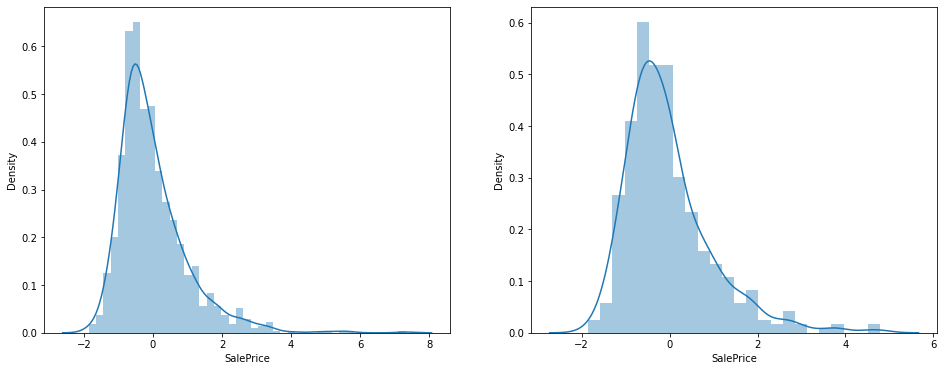

In [40]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

#### Train the model

In [41]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [42]:
y_test = df_test.pop('SalePrice')
X_test = df_test

check the valuable column using RFE

In [43]:
#Running RFE with the output number of the variable equal to 70
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [44]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [45]:
#Check RFE selected variables
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
rfe_sel_columns

['LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'YearBuilt_Old',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandContour_HLS',
 'LotConfig_CulDSac',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_Crawfor',
 'Neighborhood_MeadowV',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1Story',
 'HouseStyle_2Story',
 'RoofStyle_Shed',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_WdShngl',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior2nd_CBlock',
 'Exterior

USing RFE in traina nd test dataset

In [46]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

### Lasso regression model

In [47]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9092915209369878
0.9005756161412672


In [48]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', 0.0),
 ('LotArea', 0.028),
 ('LotShape', 0.151),
 ('LandSlope', 0.073),
 ('OverallQual', 0.084),
 ('OverallCond', 0.074),
 ('MasVnrArea', 0.055),
 ('ExterQual', 0.06),
 ('ExterCond', 0.126),
 ('BsmtQual', 0.023),
 ('BsmtCond', -0.0),
 ('BsmtExposure', 0.064),
 ('BsmtFinType1', 0.0),
 ('BsmtFinSF1', 0.074),
 ('BsmtFinType2', -0.015),
 ('BsmtFinSF2', 0.308),
 ('BsmtUnfSF', -0.063),
 ('TotalBsmtSF', -0.05),
 ('HeatingQC', 0.041),
 ('CentralAir', 0.073),
 ('1stFlrSF', 0.029),
 ('2ndFlrSF', 0.07),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', -0.073),
 ('BsmtFullBath', 0.073),
 ('BsmtHalfBath', 0.031),
 ('FullBath', 0.056),
 ('HalfBath', 0.023),
 ('BedroomAbvGr', 0.024),
 ('KitchenAbvGr', 0.026),
 ('KitchenQual', 0.033),
 ('TotRmsAbvGrd', 0.04),
 ('Fireplaces', 0.033),
 ('GarageFinish', 0.02),
 ('GarageCars', 0.075),
 ('GarageArea', 0.117),
 ('GarageQual', 0.069),
 ('GarageCond', 0.033),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', -0.113),
 ('EnclosedPorch', -0.073),
 ('3SsnPorch', -0.0

In [50]:
# Using KFold for model validation
folds = KFold(n_splits=10,shuffle=True,random_state=50)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True,
                        n_jobs = -1
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=50, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [51]:
# Let have a look on the summery of test and train score based on alpha
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.021588,0.005971,0.004103,0.003691,0.001,{'alpha': 0.001},0.845800,0.579435,0.913935,0.871371,...,0.908348,0.909034,0.908834,0.909800,0.922279,0.908089,0.905753,0.909356,0.911505,0.005389
1,0.008849,0.004760,0.001491,0.002722,0.010,{'alpha': 0.01},0.825416,0.651182,0.923769,0.854352,...,0.901035,0.900983,0.901216,0.902189,0.913365,0.900748,0.897483,0.901374,0.903651,0.005121
2,0.004099,0.003910,0.002527,0.003870,0.100,{'alpha': 0.1},0.749722,0.886930,0.889012,0.768568,...,0.813587,0.818707,0.814301,0.820799,0.843044,0.814319,0.807054,0.812570,0.818452,0.009377
3,0.005545,0.003684,0.003311,0.003862,1.000,{'alpha': 1.0},-0.070676,-0.009829,-0.001243,-0.049456,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.003901,0.003911,0.003198,0.003917,5.000,{'alpha': 5.0},-0.070676,-0.009829,-0.001243,-0.049456,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


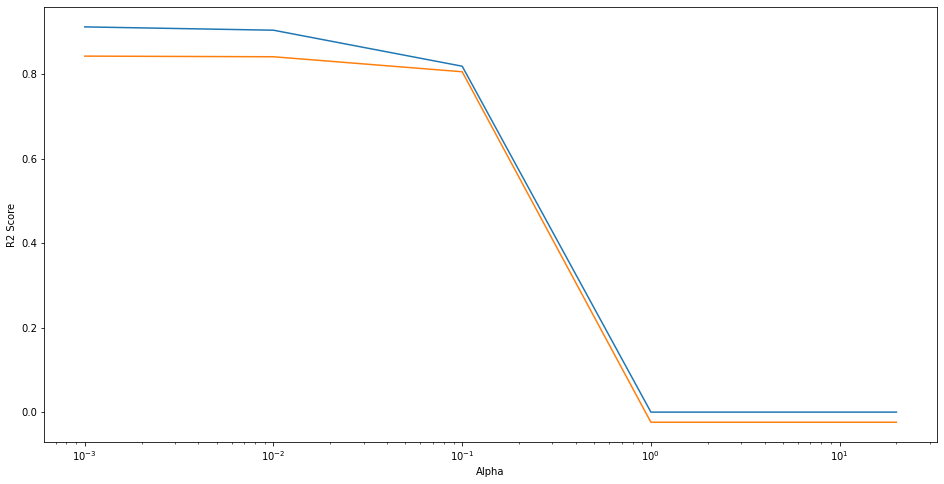

In [52]:
# Plot showing comparision of test and train score
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [53]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [54]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9092915209369878
0.9005756161412672


In [55]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [57]:
# Significant variables which predict price of house when used lasso
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
15,BsmtFinSF2,0.307926
2,LotShape,0.151181
8,ExterCond,0.125866
35,GarageArea,0.117199
68,Neighborhood_Gilbert,0.086493
4,OverallQual,0.083745
34,GarageCars,0.074962
5,OverallCond,0.074267
13,BsmtFinSF1,0.073982
19,CentralAir,0.072934


### ridge regression

In [58]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9099387716640632
0.8969661204416733


In [59]:
folds  = KFold(n_splits=10,shuffle=True,random_state=50)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        n_jobs = -1,
                        return_train_score=True)
                        

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=50, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [60]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.008999,0.004928,0.002829,0.003708,0.001,{'alpha': 0.001},0.847288,0.566780,0.913858,0.873436,...,0.908924,0.909632,0.909404,0.910335,0.923287,0.908666,0.906271,0.910081,0.912129,0.005485
1,0.001705,0.003419,0.002540,0.003887,0.010,{'alpha': 0.01},0.847288,0.566803,0.913858,0.873436,...,0.908924,0.909632,0.909404,0.910335,0.923287,0.908666,0.906271,0.910081,0.912129,0.005485
2,0.004215,0.004231,0.003311,0.004066,0.100,{'alpha': 0.1},0.847288,0.567034,0.913863,0.873432,...,0.908924,0.909632,0.909404,0.910335,0.923286,0.908666,0.906271,0.910081,0.912129,0.005485
3,0.007098,0.005826,0.002838,0.003928,0.200,{'alpha': 0.2},0.847287,0.567289,0.913868,0.873427,...,0.908923,0.909632,0.909404,0.910335,0.923284,0.908666,0.906271,0.910081,0.912129,0.005485
4,0.003331,0.003392,0.002809,0.003885,0.500,{'alpha': 0.5},0.847286,0.568048,0.913884,0.873410,...,0.908922,0.909630,0.909402,0.910333,0.923274,0.908664,0.906270,0.910078,0.912126,0.005483


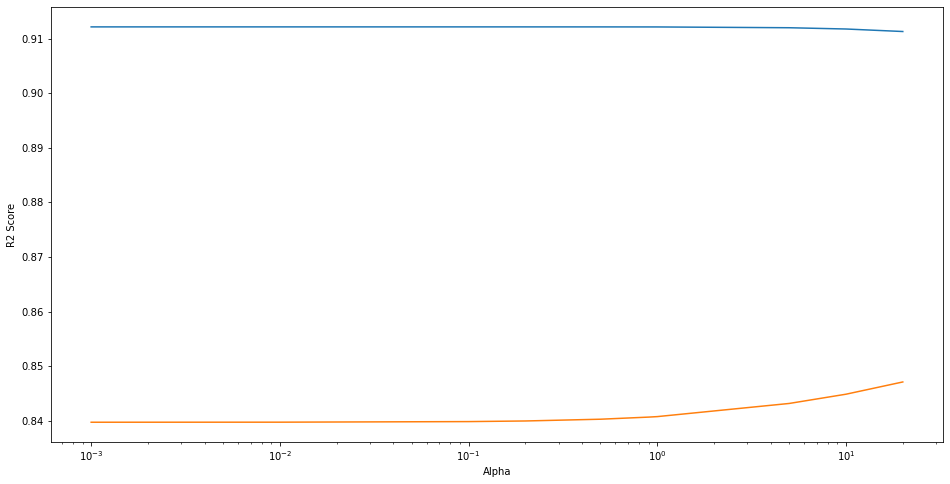

In [61]:
# Plot showing comparision of test and train score
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [62]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 20.0}

In [63]:
# After performing grid search we found the optimal alpha to be 20, so let's predict the test and train scores.
ridge = Ridge(alpha = 20.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9092878698493703
0.90024739199761


In [64]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [65]:
# Significant variables which predict price of house when used ridge
ridge_coef.sort_values(by = 'Coef',ascending = False).head(10)

,Feaure,Coef
15,BsmtFinSF2,0.189206
13,BsmtFinSF1,0.156798
2,LotShape,0.146508
35,GarageArea,0.115162
8,ExterCond,0.100207
68,Neighborhood_Gilbert,0.089485
11,BsmtExposure,0.088209
4,OverallQual,0.084223
19,CentralAir,0.079598
12,BsmtFinType1,0.078292


## Final model

In [66]:
# We have used lasso for building the modle as we got the optimal value of alpha.
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true = y_train,y_pred = y_train_pred))
print(r2_score(y_true = y_test,y_pred = y_test_pred))

0.9092915209369878
0.9005756161412672


#### Conclusion


These variables are significant in predicting the price of a house :

BsmtFinSF2 : Type 2 finished square feet.
LotShape : General shape of property.
ExterCond : Evaluates the present condition of the material on the exterior.
GarageCars : Size of garage in car capacity.
Neighborhood_Gilbert : Physical locations within Ames city limits(Gilbert).
BsmtFinSF1 : Type 1 finished square feet.
OverallQual : Rates the overall material and finish of the house.
BsmtExposure : Refers to walkout or garden level walls.
CentralAir : Central air conditioning.
OverallCond : Rates the overall condition of the house.
The optimal value of lambda for ridge and lasso regression are :

Best alpha value for Lasso : 0.001

Best alpha value for Ridge : 20.0

### Assignment Part - II
#### Question 2
#### What is the optimal value of alpha for ridge and lasso regression?

Optimal value of alpha for ridge : 20.0
Optimal value of alpha for Lasso : 0.0001
#### What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?

In [68]:
# Ridge regression
ridge = Ridge(alpha=0.640)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.03044663  0.1472771   0.07287567  0.08472206  0.07241734  0.05314906
  0.06021798  0.10199063  0.01511934 -0.02451487  0.08946431  0.07299821
  0.17633552 -0.00708594  0.20190573 -0.07042719 -0.05193822  0.04128675
  0.07756816  0.02772679  0.06976021  0.         -0.07720201  0.11241648
  0.05424869  0.13075415  0.08922153  0.02379054  0.02586388  0.03538586
  0.0415927   0.03512479  0.02323961  0.07589044  0.12005728  0.07165194
  0.03378775  0.         -0.11429931 -0.07474544 -0.07994105  0.07220835
 -0.03406624  0.          0.          0.          0.06118495  0.0351691
  0.         -0.08285137 -0.0436475  -0.03741871  0.          0.09230183
  0.06022449  0.02992503  0.04630784  0.03082632 -0.00277887  0.00687249
 -0.00433371 -0.01593371  0.00777769  0.02467786 -0.02341916  0.04788918
  0.02727325  0.15956477  0.0400682  -0.07796641]


In [70]:
from sklearn.metrics import r2_score,mean_squared_error

In [71]:
#printing the values of R2, RSS, MSE for train and test

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric4=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric4.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric4.append(mse_test_lr)

r2_train:
0.9099362380733197
r2_test:
0.8971914994088972
RSS_train:
90.7842720220938
RSS_test:
42.80943754759685
MSE_train:
0.09006376192668036
MSE_test:
0.09886706131084723


In [72]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0304
1,OverallQual,0.1473
2,OverallCond,0.0729
3,MasVnrArea,0.0847
4,ExterQual,0.0724
...,...,...
65,Functional_Typ,0.0479
66,SaleType_CWD,0.0273
67,SaleType_New,0.1596
68,SaleCondition_Normal,0.0401


In [73]:
#feature reduction - taking top 10 features from ridge
model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols =  X_train[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Featuere','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
15,BedroomAbvGr,0.201906
13,LowQualFinSF,0.176336
68,SaleCondition_Normal,0.159565
2,OverallCond,0.147277
26,MSZoning_RM,0.130754
35,Neighborhood_StoneBr,0.120057
24,MSZoning_RH,0.112416
8,BsmtFinSF2,0.101991
54,Exterior2nd_VinylSd,0.092302
11,1stFlrSF,0.089464


In [74]:
# Lasso Regression:

lm = Lasso(alpha=0.002)
lm.fit(X_train,y_train)

#r2 train
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

#r2 test
y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9085690017812693
0.9030310995756187


In [75]:
# prnitng R2, RSS, MSE of test train when we double the alpha value for Lasso
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric5=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric5.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric5.append(mse_test_lr)

r2_train:
0.9085690017812693
r2_test:
0.9030310995756187
RSS_train:
92.1624462044806
RSS_test:
40.37782929338764
MSE_train:
0.09143099821873076
MSE_test:
0.09325133786001764


In [76]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lm.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0276
1,OverallQual,0.1523
2,OverallCond,0.0720
3,MasVnrArea,0.0823
4,ExterQual,0.0759
5,BsmtQual,0.0562
6,BsmtExposure,0.0601
7,BsmtFinSF1,0.1240
8,BsmtFinSF2,0.0221
9,TotalBsmtSF,0.0637


In [77]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [79]:
# Method to get the coefficient values
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
def find(x):
    return lasso_coeff_dict[x]
# Method to get the coefficient values
lasso_coeff_dict = dict(pd.Series(lm.coef_, index = X_train_lasso.columns))

# Assign top 10 features to a temp dataframe for further display in the bar plot
df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
df = df.loc[df['rfe_support'] == True]
df.reset_index(drop=True, inplace=True)

df['Coefficient'] = df['Features'].apply(find)
df = df.sort_values(by=['Coefficient'], ascending=False)
df = df.head(10)
df

,Features,rfe_support,rfe_ranking,Coefficient
8,GrLivArea,True,1,0.301870
0,OverallQual,True,1,0.151281
5,BsmtFinSF1,True,1,0.125697
11,Neighborhood_NridgHt,True,1,0.118212
7,2ndFlrSF,True,1,0.088786
14,SaleType_New,True,1,0.086083
10,Neighborhood_NoRidge,True,1,0.075569
1,OverallCond,True,1,0.073986
2,ExterQual,True,1,0.073980
13,HouseStyle_1Story,True,1,0.072871


In [81]:
#printing R2 , RSS, MSE for test train sets
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric2.append(mse_test_lr)

r2_train:
0.9099362380733197
r2_test:
0.8971914994088972
RSS_train:
90.7842720220938
RSS_test:
42.80943754759685
MSE_train:
0.09006376192668036
MSE_test:
0.09886706131084723


In [83]:
#printing R@, RSS, MSE values for test and train sets in Lasso
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric3.append(mse_test_lr)

r2_train:
0.9092915209369878
r2_test:
0.9005756161412672
RSS_train:
91.43414689551634
RSS_test:
41.40029206764898
MSE_train:
0.09070847906301224
MSE_test:
0.09561268375900457


In [84]:
#printing the values of R2, RSS, MSE for train and test

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric4=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric4.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric4.append(mse_test_lr)

r2_train:
0.9099362380733197
r2_test:
0.8971914994088972
RSS_train:
90.7842720220938
RSS_test:
42.80943754759685
MSE_train:
0.09006376192668036
MSE_test:
0.09886706131084723


#### comparing the results of both Ridge and lasso

In [85]:
#comparing the results of both Ridge and lasso

resultTable = {'Metric':["R2 Score Train", "R2Score Test", "RSS Train", "RSS Test", "MSE Train", "MSE Test"],
              'Ridge regression':metric2}
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric3, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

,Metric,Ridge regression,Lasso regression
0,R2 Score Train,0.909936,0.909292
1,R2Score Test,0.897191,0.900576
2,RSS Train,90.784272,91.434147
3,RSS Test,42.809438,41.400292
4,MSE Train,0.090064,0.090708
5,MSE Test,0.098867,0.095613


#### Question 2
#### You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

Ans: Based on the alpha/Lambda values I have got, Ridge regression does not zero any of the co efficient, Lasso zeroed one or two coefficients in the selected features, Lasso is better option and it also helps in the some of the feature elimination.

#### Question 3
##### After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [107]:
X_train_mod = X_train_rfe.drop(["GrLivArea", "BsmtFinSF1", "Neighborhood_NridgHt", "OverallQual", "2ndFlrSF"], axis=1)
X_test_mod = X_test_rfe.drop(["GrLivArea", "BsmtFinSF1", "Neighborhood_NridgHt", "OverallQual", "2ndFlrSF"], axis=1)

In [108]:
lasso_model_mod = Lasso(alpha=0.0001)
lasso_model_mod.fit(X_train_mod,y_train)
y_train_pred_mod = lasso_model_mod.predict(X_train_mod)
y_test_pred_mod = lasso_model_mod.predict(X_test_mod)

In [109]:
lasso_model_mod.coef_

array([ 0.04645855,  0.08459182,  0.13463413,  0.14551139,  0.12691112,
        0.04891114, -0.02795254, -0.11846151,  0.21712917,  0.10629312,
       -0.01143286, -0.05506566, -0.08565444,  0.09457237,  0.27511947,
        0.1061758 ,  0.        , -0.05725833,  0.11192665,  0.06503861,
        0.14586022,  0.10386741,  0.03647745,  0.05557762,  0.09632091,
        0.07316398,  0.        , -0.10370199, -0.02640256, -0.03963414,
       -0.06948906,  0.        ,  0.        ,  0.        ,  0.06749241,
        0.04841474,  0.        , -0.03296458,  0.00682954,  0.04363507,
        0.02541941,  0.04630299, -0.        ,  0.01156297, -0.01075361,
        0.00846787, -0.00145003,  0.17236929,  0.0457472 , -0.07965126])

In [110]:
model_coeff_mod = pd.DataFrame(index=X_test_mod.columns)

In [111]:
model_coeff_mod.rows = X_test_mod.columns

In [112]:
model_coeff_mod['Lasso'] = lasso_model_mod.coef_
model_coeff_mod.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
TotRmsAbvGrd,0.275119
TotalBsmtSF,0.217129
SaleType_New,0.172369
MSZoning_RL,0.145860
ExterQual,0.145511


-------END-------